In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Data Descriptions.

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

Target
Need to perform clustering to summarize customer segments.

Methods
Performs clustering algorithims with K-Means and DBSCAN.


In [2]:
raw_data = pd.read_csv('marketing_campaign.csv', sep = '\t')
display(raw_data.head())
display(raw_data.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Cleaning an Preparation

In [3]:
print("Data info :")
print("="*50)
print(raw_data.info())
print("="*50)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 

In [4]:
print('Duplicated values :')
print("="*50)
print(raw_data.duplicated().sum())
print("="*50)

Duplicated values :
0


In [5]:
print("="*50)
print(f"Data shape = {raw_data.shape}")
raw_data.drop(columns = ['Z_CostContact','Z_Revenue'], inplace = True)
print(f"Data new shape = {raw_data.shape}")
print("="*50)

Data shape = (2240, 29)
Data new shape = (2240, 27)


In [6]:
raw_data['Dt_Customer'] = pd.to_datetime(raw_data['Dt_Customer'],format="%d-%m-%Y")
raw_data['Enroll_time'] = (pd.to_datetime('today') - raw_data['Dt_Customer']).dt.days/365
raw_data['Income'] = raw_data['Income'].fillna(value = np.mean(raw_data['Income']))
raw_data['Age'] = 2022 - raw_data['Year_Birth']
print(raw_data['Dt_Customer'].dtypes)

datetime64[ns]


## Exploratory Data Analysis

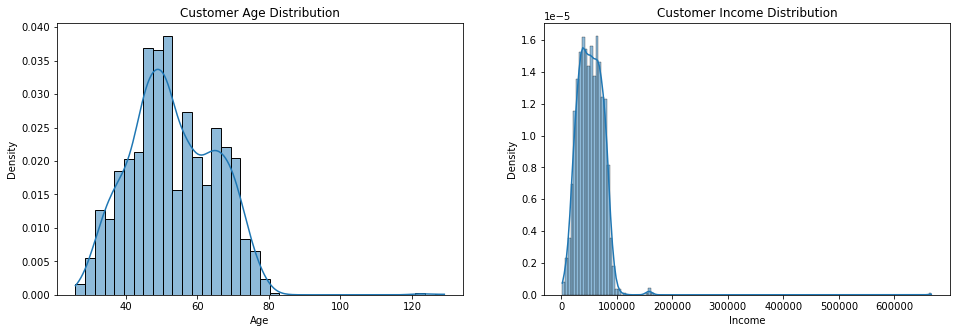

In [7]:
# Check The Customer Age Distribution 
fig, ax = plt.subplots(1,2 , figsize = (16,5))

sns.histplot(x = 'Age', data = raw_data,stat = 'density', kde = True, ax = ax[0])
ax[0].set_title('Customer Age Distribution')

sns.histplot(x = 'Income', data = raw_data,stat = 'density', kde = True, ax = ax[1])
ax[1].set_title('Customer Income Distribution')

plt.show()

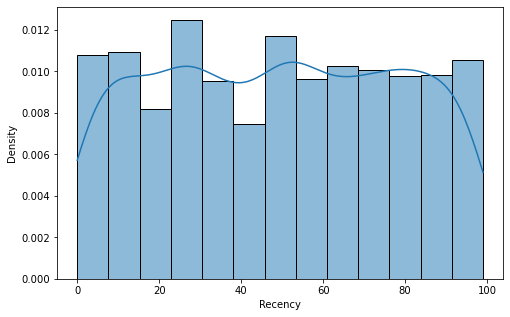

In [8]:
# days of the last Customer's Purchases Distribution
plt.figure(figsize = (8,5))
sns.histplot(x = 'Recency', data = raw_data, stat = 'density', kde = True)
plt.show()

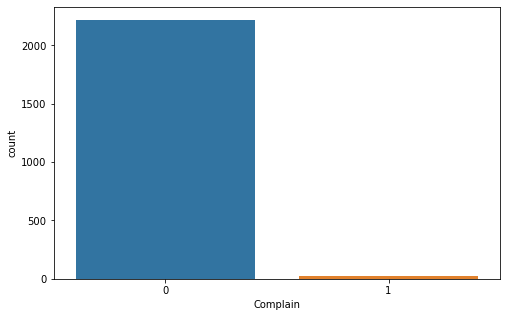

In [9]:
plt.figure(figsize = (8,5))
sns.countplot(x = "Complain", data = raw_data)
plt.show()

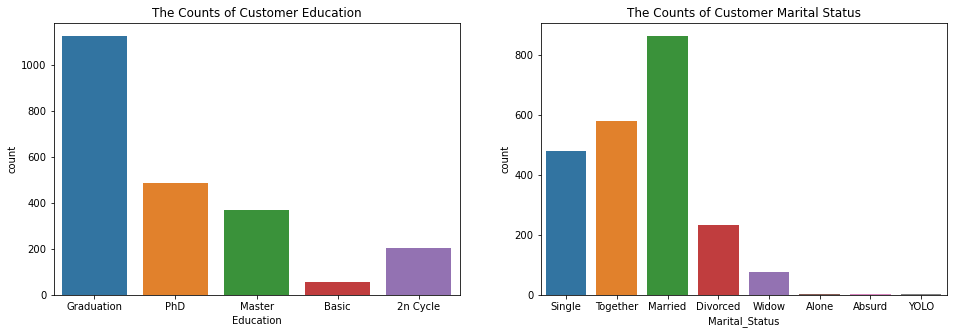

The Counts of Customer Education :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
The Counts of Customer Marital Status :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [10]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

sns.countplot(x = 'Education', data = raw_data, ax= ax[0])
ax[0].set_title('The Counts of Customer Education')

sns.countplot(x = 'Marital_Status', data = raw_data, ax = ax[1])
ax[1].set_title('The Counts of Customer Marital Status')

plt.show()
print("="*50)
print("The Counts of Customer Education :")
print(raw_data['Education'].value_counts(ascending = False))
print("="*50)
print("The Counts of Customer Marital Status :")
print(raw_data['Marital_Status'].value_counts(ascending = False))
print("="*50)


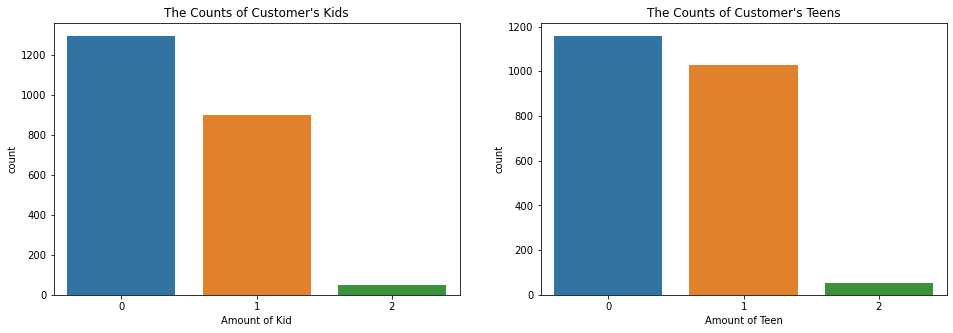

The Counts of Customer's Kids :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
The Counts of Customer's Teens :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


In [11]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

sns.countplot(x = 'Kidhome', data = raw_data, ax= ax[0])
ax[0].set_title("The Counts of Customer's Kids")
ax[0].set_xlabel('Amount of Kid')

sns.countplot(x = 'Teenhome', data = raw_data, ax = ax[1])
ax[1].set_title("The Counts of Customer's Teens")
ax[1].set_xlabel('Amount of Teen')
plt.show()
print("="*50)
print("The Counts of Customer's Kids :")
print(raw_data['Kidhome'].value_counts(ascending = False))
print("="*50)
print("The Counts of Customer's Teens :")
print(raw_data['Teenhome'].value_counts(ascending = False))
print("="*50)

In [12]:
print(raw_data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Enroll_time', 'Age'],
      dtype='object')


In [13]:
# Statistics for amount of product purchases 

product_amt = raw_data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe().T
display(product_amt)

,count,mean,std,min,25%,50%,75%,max
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


In [14]:
campaign_prop = raw_data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].describe().T
display(campaign_prop)

,count,mean,std,min,25%,50%,75%,max
AcceptedCmp1,2240.0,0.064286,0.245316,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2240.0,0.013393,0.114976,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2240.0,0.074554,0.262728,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2240.0,0.072768,0.259813,0.0,0.0,0.0,0.0,1.0
Response,2240.0,0.149107,0.356274,0.0,0.0,0.0,0.0,1.0


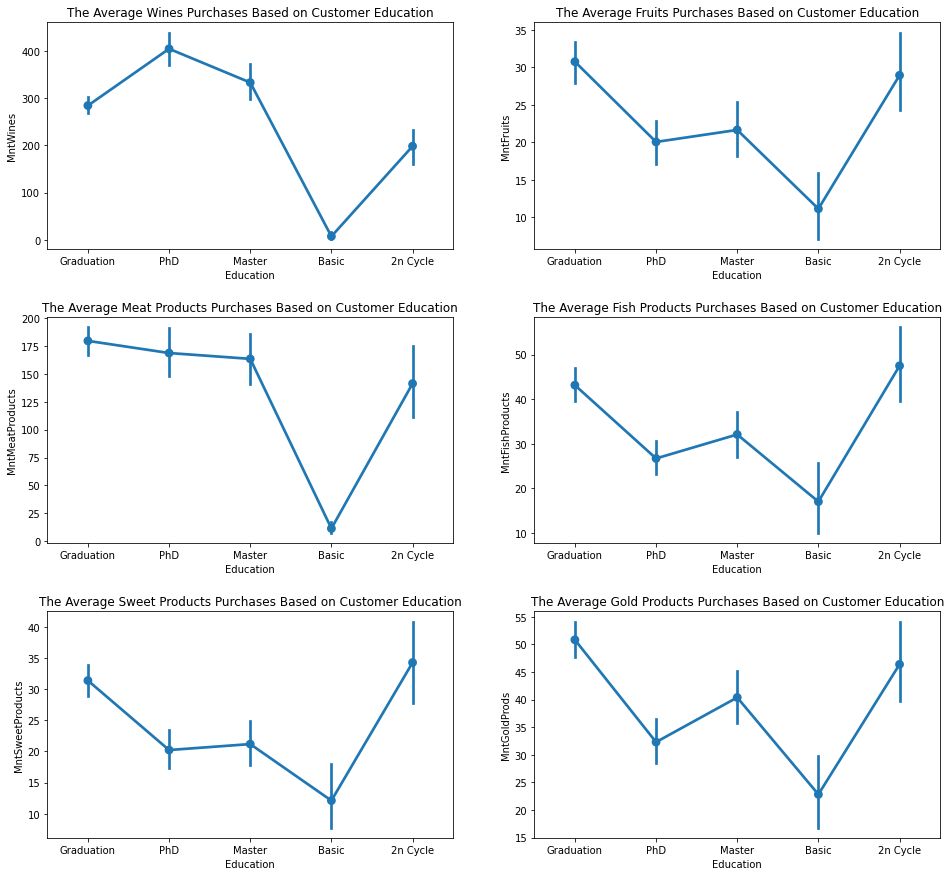

In [15]:
fig, ax = plt.subplots(3,2, figsize = (16,15))

sns.pointplot(x = 'Education', y = 'MntWines', data = raw_data, ax = ax[0,0])
ax[0,0].set_title("The Average Wines Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntFruits', data = raw_data, ax = ax[0,1])
ax[0,1].set_title("The Average Fruits Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntMeatProducts', data = raw_data, ax = ax[1,0])
ax[1,0].set_title("The Average Meat Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntFishProducts', data = raw_data, ax = ax[1,1])
ax[1,1].set_title("The Average Fish Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntSweetProducts', data = raw_data, ax = ax[2,0])
ax[2,0].set_title("The Average Sweet Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntGoldProds', data = raw_data, ax = ax[2,1])
ax[2,1].set_title("The Average Gold Products Purchases Based on Customer Education")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

plt.show()

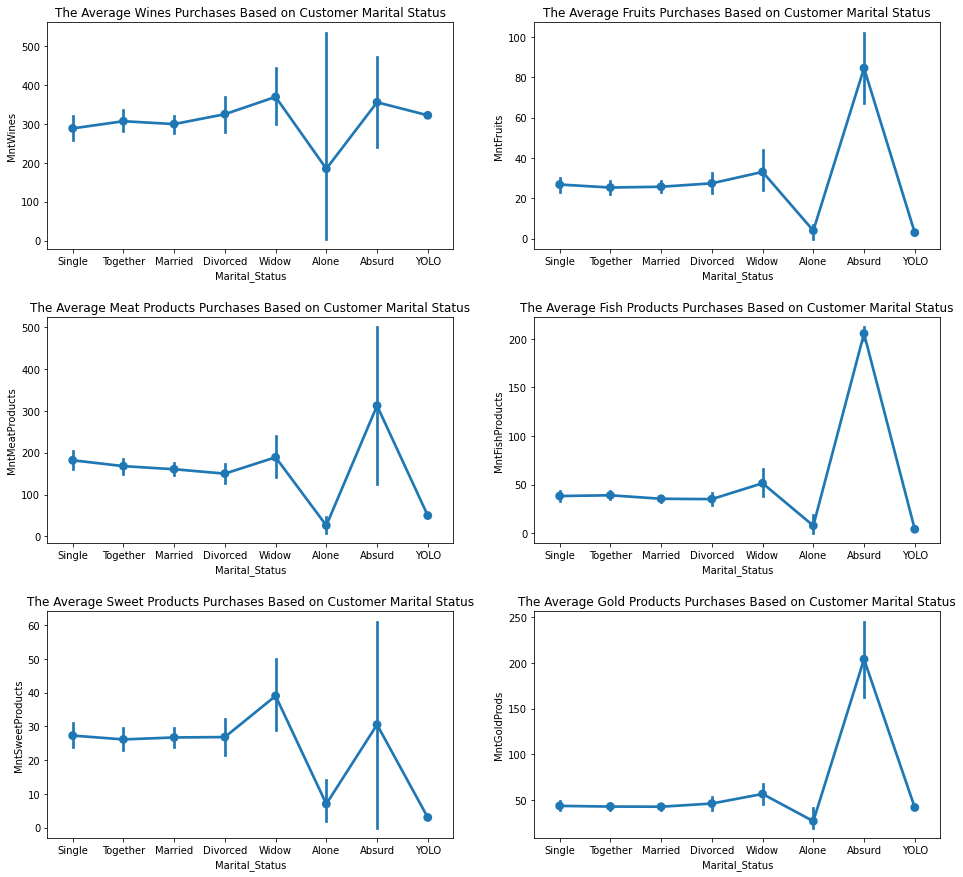

In [16]:
fig, ax = plt.subplots(3,2, figsize = (16,15))

sns.pointplot(x = 'Marital_Status', y = 'MntWines', data = raw_data, ax = ax[0,0])
ax[0,0].set_title("The Average Wines Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntFruits', data = raw_data, ax = ax[0,1])
ax[0,1].set_title("The Average Fruits Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntMeatProducts', data = raw_data, ax = ax[1,0])
ax[1,0].set_title("The Average Meat Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntFishProducts', data = raw_data, ax = ax[1,1])
ax[1,1].set_title("The Average Fish Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntSweetProducts', data = raw_data, ax = ax[2,0])
ax[2,0].set_title("The Average Sweet Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntGoldProds', data = raw_data, ax = ax[2,1])
ax[2,1].set_title("The Average Gold Products Purchases Based on Customer Marital Status")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

plt.show()

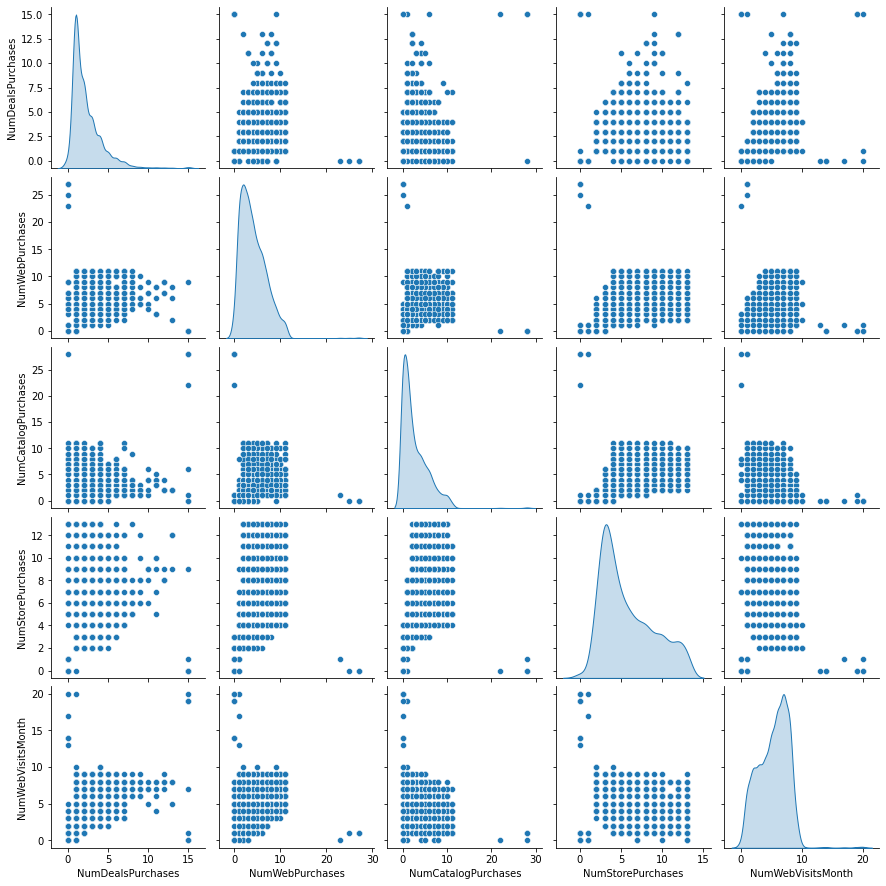

In [17]:
data_1 = raw_data.copy()[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
sns.pairplot(data_1,diag_kind = 'kde')
plt.show()

In [18]:
display(data_1.describe().T)

,count,mean,std,min,25%,50%,75%,max
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2240.0,2.662054,2.923101,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2240.0,5.790179,3.250958,0.0,3.0,5.0,8.0,13.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.0,6.0,7.0,20.0


## Data Preprocessing

In [19]:
print('Data Info')
print("="*50)
print(raw_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     22

In [20]:
new_data = pd.get_dummies(raw_data, drop_first=True)
print('Data Info')
print("="*50)
print(new_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds            

In [21]:
# drop the unnecessary columns
new_data.drop(columns = ['ID','Year_Birth','Dt_Customer'],inplace = True)
print('Data Info')
print("="*50)
print(new_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMo

## Clustering Analysis

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.express as px
from IPython.display import display

In [25]:
SS = StandardScaler()
data_scaled = SS.fit_transform(new_data.values)
print("="*50)
print('Scaled Data Shape :')
print(data_scaled.shape)
print("="*50)
k_clusters = np.arange(1,21)
n_inertia = []
print('Number of Cluster\tInertia')
for k in k_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia = kmeans.inertia_
    n_inertia.append(inertia)
    print(f'{k}\t\t\t{inertia}')

Scaled Data Shape :
(2240, 35)
Number of Cluster	Inertia


C:\Users\naufa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



1			78400.0
2			66959.95252931742
3			63266.07068489513
4			60693.720617400846
5			58359.19938656557
6			56593.6948330137
7			54984.794634063044
8			53860.88196402032
9			51302.153539110746
10			49305.08075362128
11			47949.101040091904
12			47132.27587097881
13			45082.96170087776
14			44210.06743017347
15			42779.32707909282
16			41735.92137237142
17			40284.49540602395
18			40186.64941396968
19			38943.52505315493
20			38285.42274901102


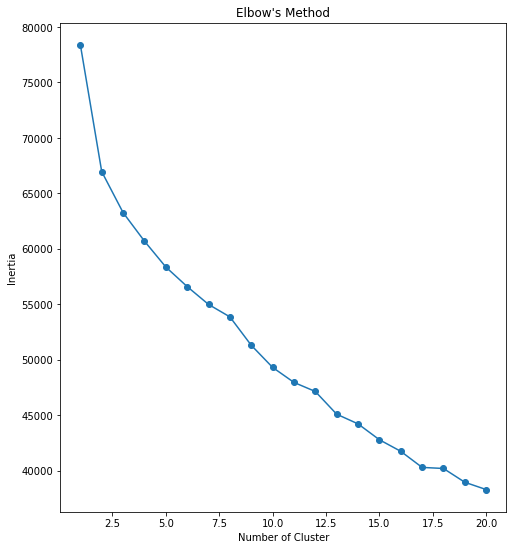

In [26]:
fig, ax = plt.subplots(figsize = (8,9))
ax.plot(k_clusters,n_inertia, marker = 'o')
ax.set_title("Elbow's Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Inertia")
plt.show()

In [64]:
## Choose 12 clusters for customer segmentation and procceed to perform PCA.
kmeans = KMeans(n_clusters = 8, random_state= 42)
labels = kmeans.fit_predict(data_scaled).reshape(-1,1)
pca = PCA(n_components=3, random_state=42)
reduced_data = pca.fit_transform(data_scaled)
explaned_var = (np.sum(pca.explained_variance_ratio_))*100

In [65]:
print('Labels Shape :')
print(labels.shape)
print('Reduced Data Shape :')
print(reduced_data.shape)
print('Cummulative Explained Variance Ratio By PCA :')
print(explaned_var)

Labels Shape :
(2240, 1)
Reduced Data Shape :
(2240, 3)
Cummulative Explained Variance Ratio By PCA :
30.69052736100357


In [55]:
print(np.ravel(labels[:10]))

[6 4 1 7 0 3 3 2 7 7]


In [66]:
color_dict = {0:'cluster 1',1 :'cluster 2',2:'cluster 3', 3:'cluster 4',4:'cluster 5', 5 : 'cluster 6', 6 :'cluster 7', 7 : 'cluster 8'}
list_1  = np.array(list(map((lambda x : color_dict[x]), np.ravel(labels))))
print(list_1.shape)

(2240,)


In [67]:
# Perfoms analysis on given data
new_data['Cluster'] = list_1
grouped_data = new_data.groupby('Cluster')[new_data.columns].mean()
display(grouped_data.T)

Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8
Income,29209.711809,46094.891429,82152.707317,74789.727456,43785.580092,55519.219613,48432.000000,57918.260266
Kidhome,0.856867,0.531429,0.054878,0.048780,0.655773,0.243243,0.000000,0.252847
Teenhome,0.054159,0.662857,0.121951,0.207317,0.921569,0.662162,1.000000,0.936219
Recency,46.756286,49.360000,49.475610,49.036585,51.893246,49.162162,3.000000,49.002278
MntWines,29.541586,223.388571,879.750000,492.697561,78.215686,347.905405,322.000000,496.298405
MntFruits,6.127660,13.074286,56.707317,72.160976,4.899782,33.283784,3.000000,22.453303
MntMeatProducts,24.735010,74.554286,471.353659,441.095122,29.385621,179.932432,50.000000,143.687927
MntFishProducts,9.630561,17.057143,77.560976,105.402439,7.015251,52.189189,4.000000,29.767654
MntSweetProducts,6.324952,10.834286,66.323171,70.402439,4.877996,39.621622,3.000000,24.000000
MntGoldProds,18.042553,31.085714,78.317073,77.721951,14.653595,52.905405,42.000000,64.706150


In [68]:
df_reduced = pd.DataFrame({'Component 1' : reduced_data[:,0],'Component 2' : reduced_data[:,1],'Component 3' : reduced_data[:,2], 'labels' : labels[:,0]})
df_reduced['labels'] = df_reduced['labels'].replace({0:'cluster 1',1 :'cluster 2',2:'cluster 3', 3:'cluster 4',4:'cluster 5', 5 : 'cluster 6', 6 :'cluster 7', 7 : 'cluster 8'})
display(df_reduced.head())
print("="*50)
print("Cluster Counts :")
print(df_reduced['labels'].value_counts())

,Component 1,Component 2,Component 3,labels
0,3.855238,-0.576403,-0.455666,cluster 4
1,-2.376877,-0.682603,-0.322743,cluster 5
2,1.641727,-0.447405,-1.385560,cluster 4
3,-2.511108,-1.640871,-0.101125,cluster 1
4,-0.504954,0.161817,-0.088841,cluster 8


Cluster Counts :
cluster 1    517
cluster 5    459
cluster 8    439
cluster 4    410
cluster 2    175
cluster 3    164
cluster 6     74
cluster 7      2
Name: labels, dtype: int64


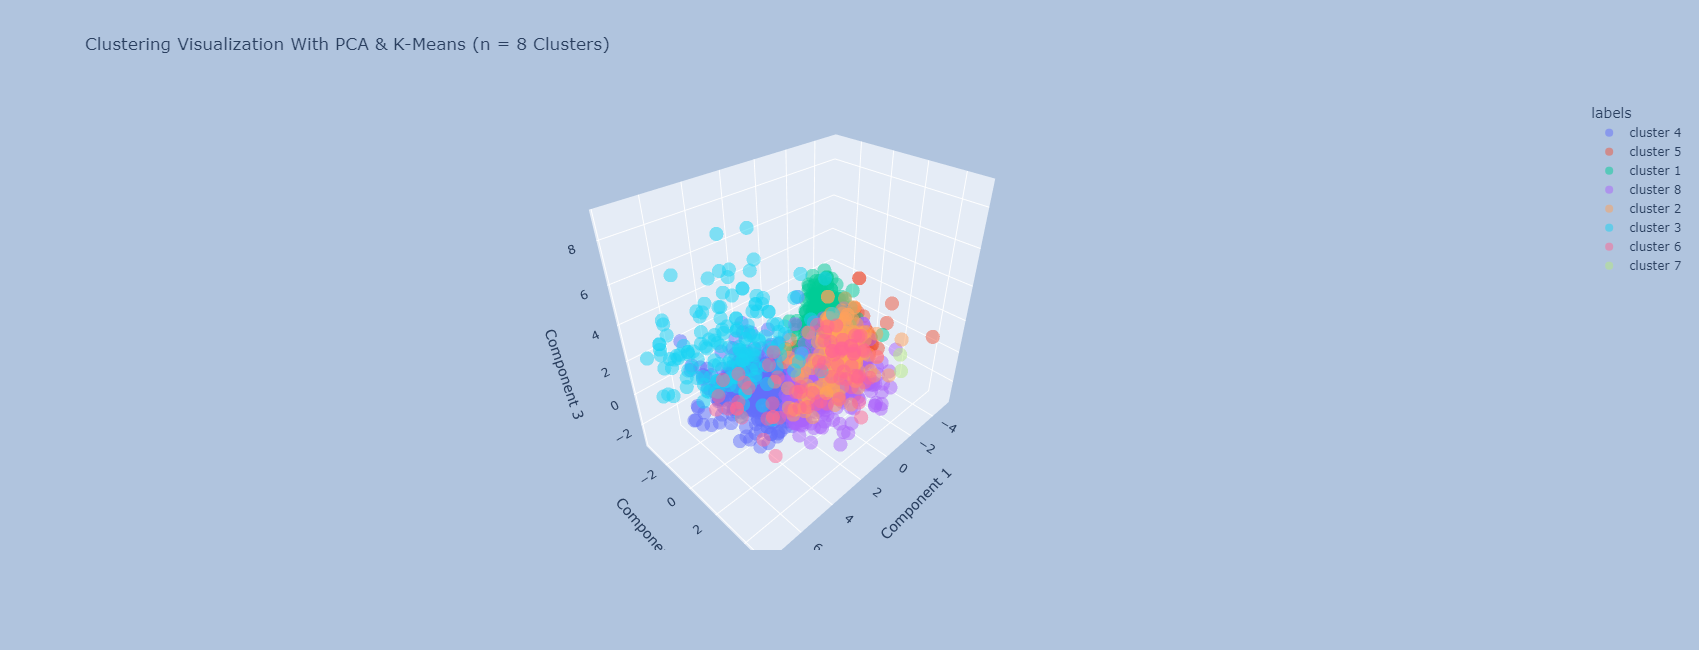

In [39]:
fig = px.scatter_3d(df_reduced, x = 'Component 1', y = 'Component 2', z = 'Component 3', color = 'labels', opacity=0.5)
fig.update_layout( title = 'Clustering Visualization With PCA & K-Means (n = 8 Clusters)' ,autosize=False, width=650, height=650, margin=dict( l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue")
fig.show()

In [31]:
db = DBSCAN(eps= 5,min_samples=20,n_jobs=-1)
labels = db.fit_predict(data_scaled).reshape(-1,1)
pca = PCA(n_components=3, random_state=42)
reduced_data = pca.fit_transform(data_scaled)
explaned_var = (np.sum(pca.explained_variance_ratio_))*100

In [32]:
df_reduced = pd.DataFrame({'Component 1' : reduced_data[:,0],'Component 2' : reduced_data[:,1],'Component 3':reduced_data[:,2], 'labels' : labels[:,0]})
display(df_reduced.head())
print("="*50)
print("Cluster Counts :")
print(df_reduced['labels'].value_counts())

,Component 1,Component 2,Component 3,labels
0,3.855238,-0.576403,-0.455666,0
1,-2.376877,-0.682603,-0.322743,0
2,1.641727,-0.447405,-1.385560,0
3,-2.511108,-1.640871,-0.101125,0
4,-0.504954,0.161817,-0.088841,0


Cluster Counts :
 0    1820
-1     318
 1      51
 2      51
Name: labels, dtype: int64


In [33]:
df_reduced['labels'] = df_reduced['labels'].replace({0:'cluster 1',1 :'cluster 2',2:'cluster 3', -1 :'noise'})

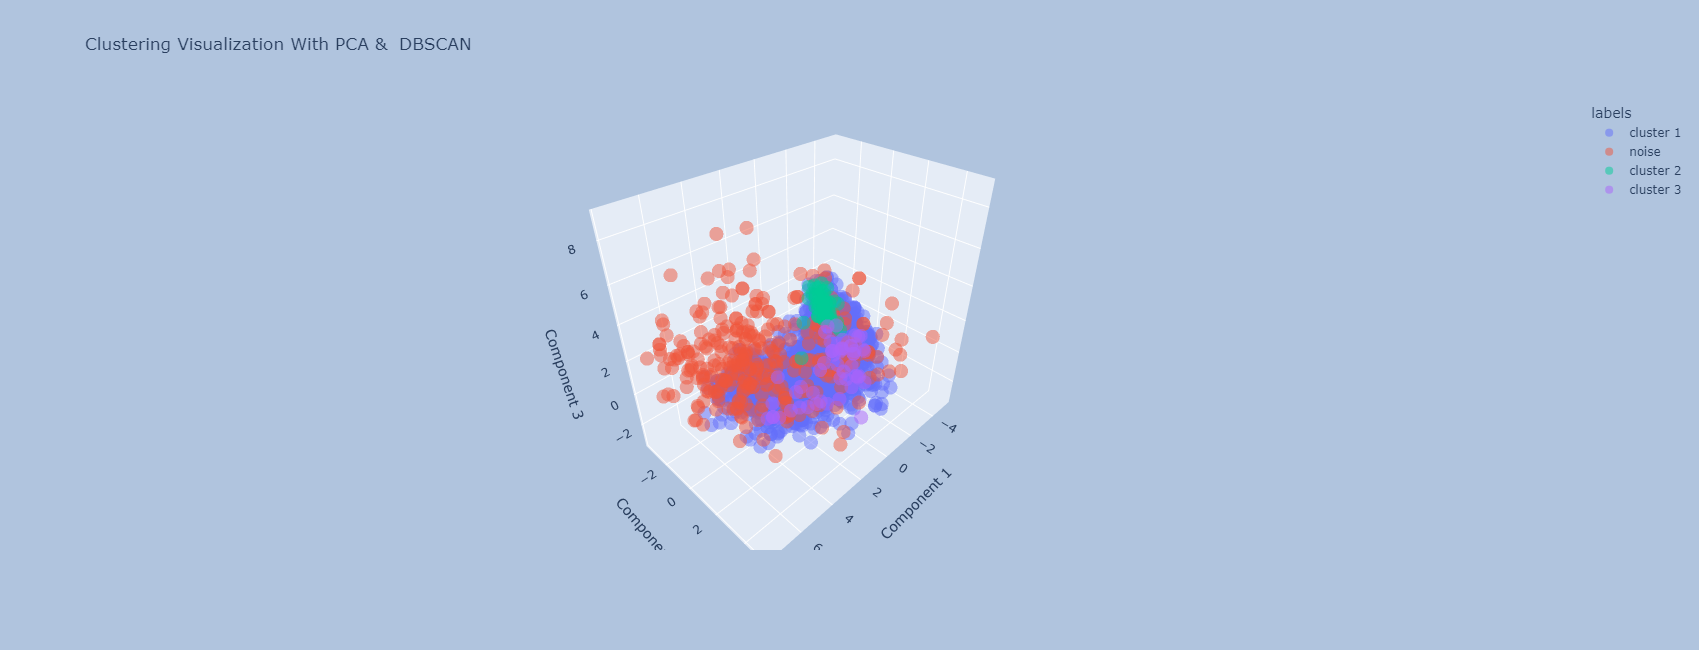

In [35]:
fig = px.scatter_3d(df_reduced, x = 'Component 1', y = 'Component 2', z = 'Component 3', color = 'labels',opacity=0.5)
fig.update_layout(
    autosize=False,
    title = 'Clustering Visualization With PCA &  DBSCAN',
    width=650,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()